# Discrete Fourier Transform and Fast Fourier Transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
import time
# Remove all future warnings
import warnings
warnings.filterwarnings("ignore")

# Discrete Fourier Transform

In [3]:
N = 256 # given number of points
w = np.exp(-1j * 2 * np.pi /N) # fundamental frequency

Transforming time was 0.10 s


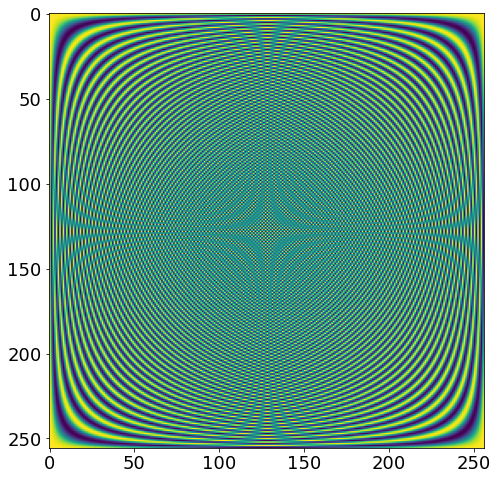

In [4]:
def slow_DFT(n=256):
    start = time.time()
    w = np.exp(-1j * 2 * np.pi /N) # fundamental frequency

    ft = np.zeros((n,n))
    for i in range(n):
        for k in range(n):
            ft[i,k] = w**(i*k)
    ft = np.real(ft)
    end = time.time()
    tran_time = end - start
    print('Transforming time was {:.2f} s'.format(tran_time))
    return ft,tran_time
dft,_ = slow_DFT(N)
plt.imshow(dft)
plt.show()

J =  [[  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 ...
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]]
K =  [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [253 253 253 ... 253 253 253]
 [254 254 254 ... 254 254 254]
 [255 255 255 ... 255 255 255]]
J*K =  [[    0     0     0 ...     0     0     0]
 [    0     1     2 ...   253   254   255]
 [    0     2     4 ...   506   508   510]
 ...
 [    0   253   506 ... 64009 64262 64515]
 [    0   254   508 ... 64262 64516 64770]
 [    0   255   510 ... 64515 64770 65025]]
Transforming time was 0.01 s


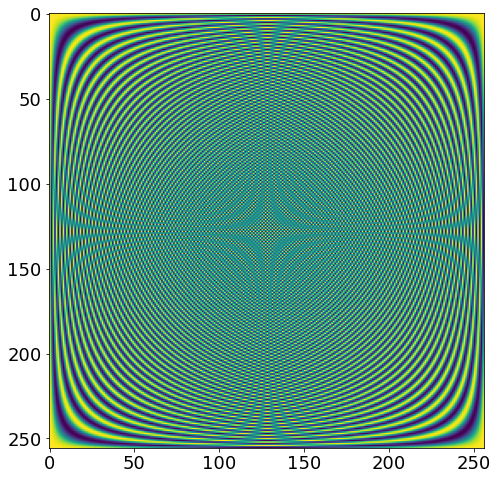

In [5]:
def fast_DFT(n):
    start = time.time()
    w = np.exp(-1j * 2 * np.pi /N) # fundamental frequency
    # meshgrid function return coordinate matrices
    # from coordinate vectors.
    J,K = np.meshgrid(np.arange(n),np.arange(n))
    print('J = ',J)
    print('K = ',K)
    print('J*K = ', J*K)
    ft = np.power(w,J*K)
    ft = np.real(ft)
    end = time.time()
    tran_time = end - start
    print('Transforming time was {:.2f} s'.format(tran_time))
    return ft, tran_time
fft,_ = fast_DFT(N)
plt.imshow(fft)
plt.show()

# Fast Fourier Transform

## Denoise

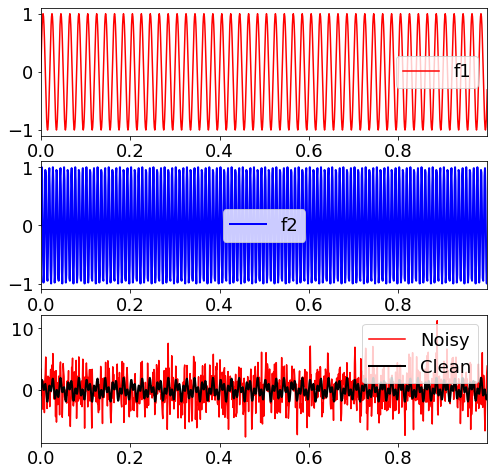

In [6]:
# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f1 = np.sin(2*np.pi*50*t)
f2 = np.sin(2*np.pi*120*t)
f_clean = f1 + f2 # Sum of 2 frequencies
# Add some noise
np.random.seed(24)
f = f_clean + 2.5*np.random.randn(len(t))
plt.subplot(3,1,1)
plt.plot(t,f1,color='r',LineWidth=1.5,label='f1')
plt.xlim(t[0],t[-1])
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,f2,color='b',LineWidth=2,label='f2')
plt.xlim(t[0],t[-1])
plt.legend()

plt.subplot(3,1,3)
plt.plot(t,f,color='r',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

PSD normalized squared magnitude of ˆf,
and indicates how much power the signal contains in each frequency

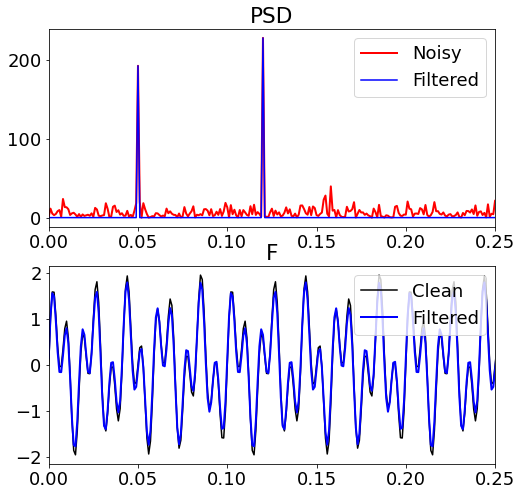

In [24]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz

## Use the PSD to filter out noise
# Find all freqs with large power
#indices = PSD > 100       # Find all freqs with large power
#PSDclean = PSD * indices  # Zero out all others
#fhat =  fhat * indices     # Zero out small Fourier coeffs. in Y

PSDclean = np.where(PSD>100,PSD,0)
fhat = np.where(PSD>100,fhat,0)
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

L = n//4 # Only plot the first quarter of freqs

plt.subplot(2,1,1)
plt.plot(t,PSD,color='r',LineWidth=2,label='Noisy')
plt.plot(t,PSDclean,color='b',LineWidth=1.5,label='Filtered')
plt.xlim(t[0],t[L])
plt.legend()
plt.title('PSD')
plt.subplot(2,1,2)
plt.plot(t,f_clean,color='k',LineWidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[L])
plt.legend()
plt.title('F')
plt.show()

## Spectral Derivative

The use of the FFT for the fast and accurate
computation of derivatives.

$$f (x) = cos(x)e^{−x^2/25}$$

$$f'(x) = −sin(x)e^{−x^2/25} − \frac{2}{25}xf(x)$$

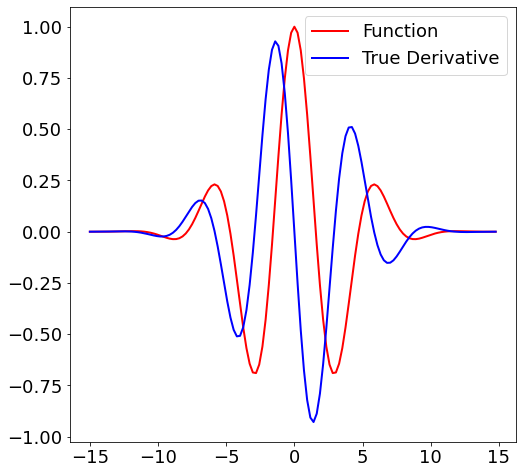

In [29]:
n = 128 # number of points
L = 30 # length
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) # Derivative
plt.plot(x,f.real,color='r',LineWidth=2,label='Function')
plt.plot(x,df.real,color='b',LineWidth=2,label='True Derivative')
plt.legend()
plt.show()

In [32]:
## Approximate derivative using finite difference
dfFD = np.zeros(len(df),dtype='complex_')
for kappa in range(len(df)-1):
    dfFD[kappa] = (f[kappa+1]-f[kappa])/dx

dfFD[-1] = dfFD[-2]

In [30]:
## Derivative using FFT (spectral derivative)
fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa) # Re-order fft frequencies
dfhat = kappa * fhat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))


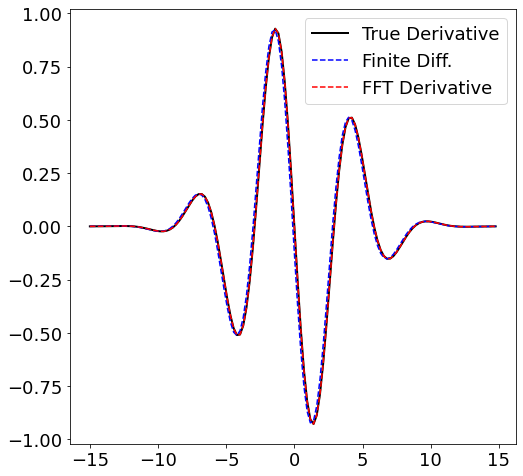

In [36]:
## Plots
plt.plot(x,df.real,color='k',LineWidth=2,label='True Derivative')
plt.plot(x,dfFD.real,'--',color='b',LineWidth=1.5,label='Finite Diff.')
plt.plot(x,dfFFT.real,'--',color='r',LineWidth=1.5,label='FFT Derivative')
plt.legend()
plt.show()

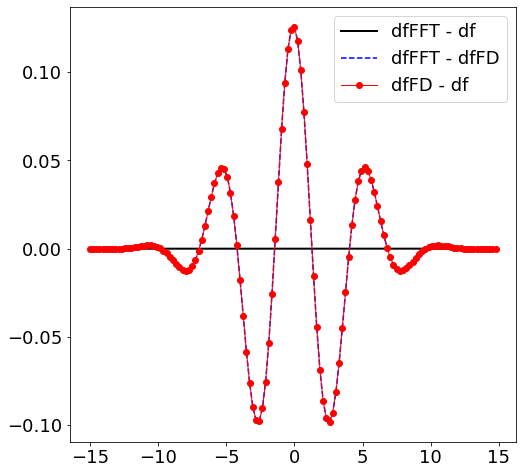

In [37]:
# Different between dfFFT and others
## Plots
plt.plot(x,dfFFT.real-df.real,color='k',LineWidth=2,label='dfFFT - df')
plt.plot(x,dfFFT.real-dfFD.real,'--',color='b',LineWidth=1.5,label='dfFFT - dfFD')
plt.plot(x,df.real-dfFD.real,'-o',color='r',LineWidth=1,label='dfFD - df')

plt.legend()
plt.show()
